In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df = pd.read_csv('/kaggle/input/imdb-top-1000-movies/imdb_clean.csv')
print(df.shape)

#no na values present
print(df.isna().mean())

#printing the types of variables
print(df.dtypes)



/kaggle/input/imdb-top-1000-movies/imdb_clean.csv
/kaggle/input/imdb-top-1000-movies/imdb_raw.csv
(2532, 9)
Unnamed: 0      0.0
title           0.0
director        0.0
release_year    0.0
runtime         0.0
genre           0.0
rating          0.0
metascore       0.0
gross(M)        0.0
dtype: float64
Unnamed: 0        int64
title            object
director         object
release_year      int64
runtime           int64
genre            object
rating          float64
metascore         int64
gross(M)        float64
dtype: object


['runtime', 'rating', 'metascore']


Text(0, 0.5, 'gross income in millions')

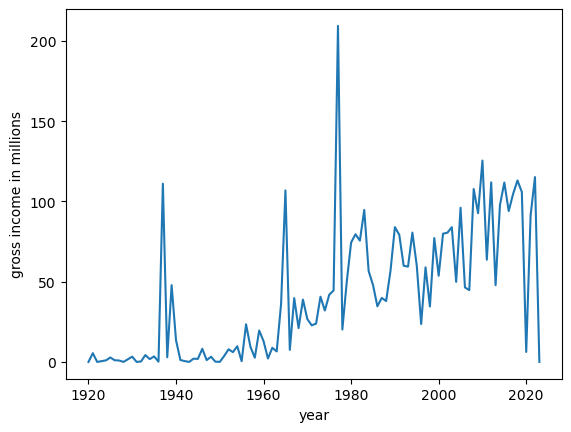

In [2]:
#now we will gather the categorical and numerical values
numerical_vals = [feature for feature in list(df.columns) if str(df[feature].dtypes).endswith('64') and feature != 'release_year' and feature != 'gross(M)' and feature!= 'Unnamed: 0']
print(numerical_vals)
#exploring the relationship between the year and the gross amount earned
unique_years = [year for year in list(df['release_year'].unique())]
unique_years.sort()

#calculating the median gross income for each year
mean_inc = []
for i in unique_years:
    incomes = df.loc[df['release_year']==i,'gross(M)']
    mean_inc.append(incomes.mean())
    

plt.plot(unique_years,mean_inc)
plt.xlabel('year')
plt.ylabel('gross income in millions')
#as we can see a clear linear trend with the gross income generally increasing with the years.

    



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Jon Watts'),
  Text(1, 0, 'Joseph Kosinski'),
  Text(2, 0, 'Anthony Russo'),
  Text(3, 0, 'Gareth Edwards'),
  Text(4, 0, 'J.J. Abrams'),
  Text(5, 0, 'Josh Cooley'),
  Text(6, 0, 'Roger Allers'),
  Text(7, 0, 'James Cameron'),
  Text(8, 0, 'Tim Miller'),
  Text(9, 0, 'George Lucas')])

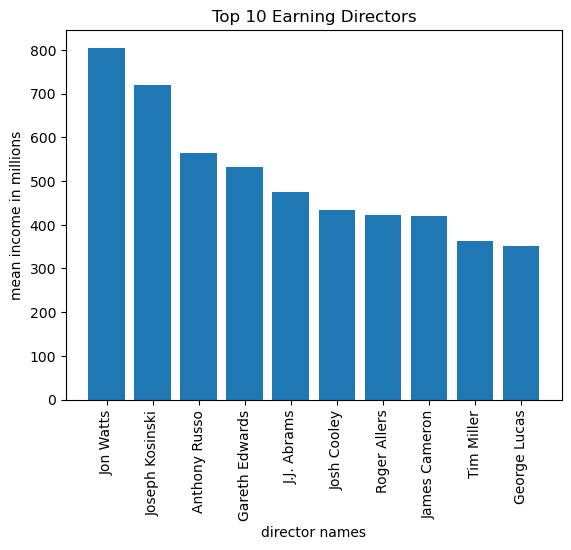

In [3]:
#gathering the top 10 directors
uniq = list(df['director'].unique())
mean_income = {}
    
for i in uniq:
    income = list(df.loc[df['director'] == i,'gross(M)'])
    mean_income[i] = round(sum(income)/len(income))
    


incomes = list(mean_income.values())
incomes.sort(reverse=True)
directors = list(mean_income.keys())
sorted_directors = {}

def access_key(val,diction):
    for key,value in diction.items():
        if value == val:
            return key
        
for income in incomes:
    sorted_directors[access_key(income,mean_income)] = income
    
dict_items = sorted_directors.items()
top_10 = list(dict_items)[:10]
top_directors = []
top_incomes = []
for i in range(len(top_10)):
    top_directors.append(top_10[i][0])
    top_incomes.append(top_10[i][1])
    

    
plt.bar(top_directors,top_incomes)
plt.xlabel('director names')
plt.ylabel('mean income in millions')
plt.title('Top 10 Earning Directors')
plt.xticks(rotation=90)


    


        

    


['runtime', 'rating', 'metascore']


/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


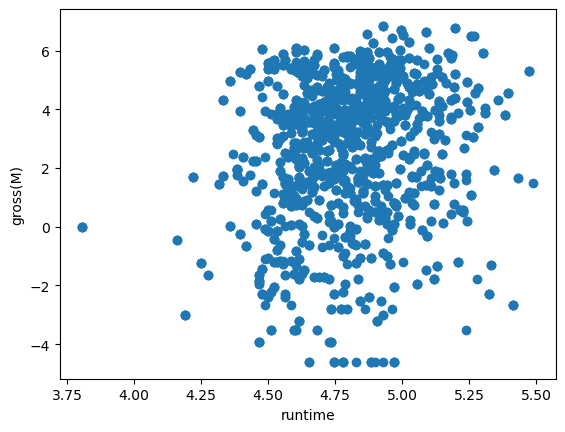

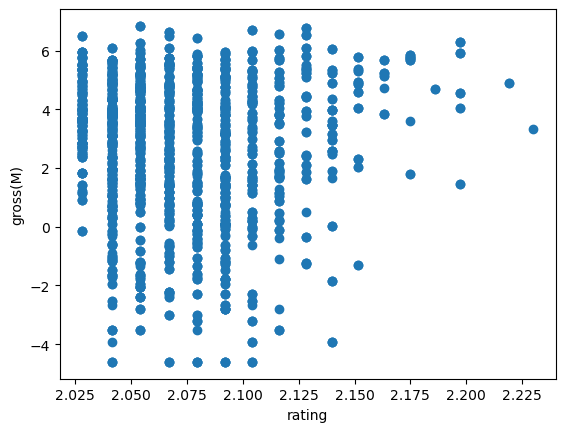

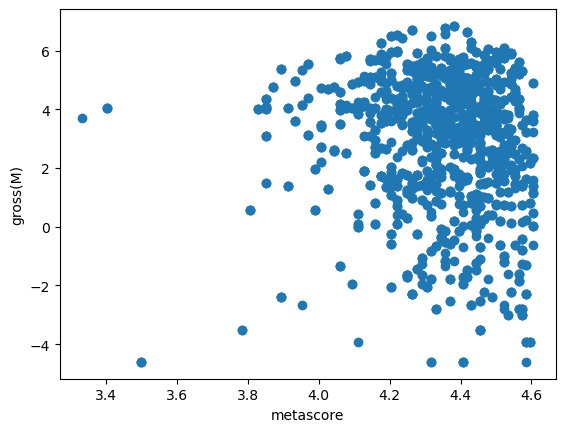

In [4]:
#finding the distribution of the continuous values
import numpy as np
print(numerical_vals)


#from the graphs it is clear that this is not a guassian distribution so we will apply log 
#function and transform the graphs
for feature in numerical_vals:
    dataset = df.copy()
    
        
    #dataset[feature] = np.log(dataset[feature])
    #dataset['gross(M)'] = np.log(dataset['gross(M)'])
    plt.scatter(np.log(dataset[feature]),np.log(dataset['gross(M)']))
    plt.xlabel(feature)
    plt.ylabel('gross(M)')
    plt.show()
    
    


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Crime'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'History'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Animation'),
  Text(7, 0, 'Sci-Fi'),
  Text(8, 0, 'Romance'),
  Text(9, 0, 'Western'),
  Text(10, 0, 'Mystery'),
  Text(11, 0, 'Comedy'),
  Text(12, 0, 'Fantasy'),
  Text(13, 0, 'War'),
  Text(14, 0, 'Thriller'),
  Text(15, 0, 'Family'),
  Text(16, 0, 'Horror'),
  Text(17, 0, 'Music'),
  Text(18, 0, 'Film-Noir'),
  Text(19, 0, 'Musical'),
  Text(20, 0, 'Sport')])

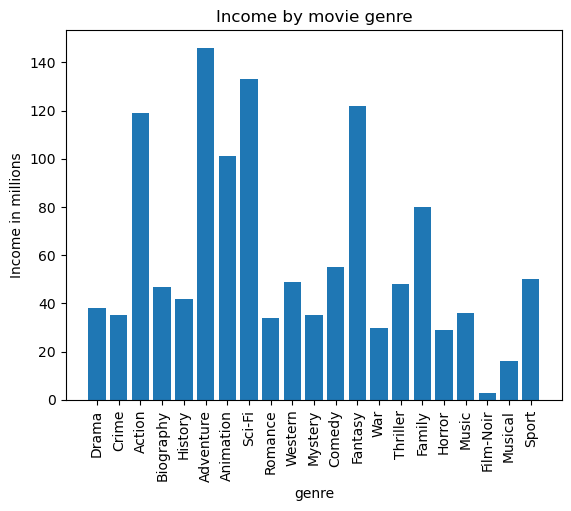

In [5]:
#representing the mean income by genre
uniq_genres = [genre for genre in list(df['genre'].unique())]
genre_incomes = []
for genre in uniq_genres:
    earning = list(df.loc[df['genre'] == genre,'gross(M)'])
    mean_genre = round(sum(earning)/len(earning))
    genre_incomes.append(mean_genre)

plt.bar(uniq_genres,genre_incomes)
plt.xlabel('genre')
plt.ylabel("Income in millions")
plt.title('Income by movie genre')
plt.xticks(rotation=90)

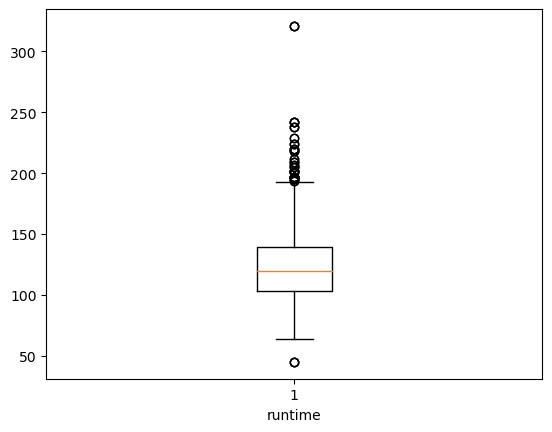

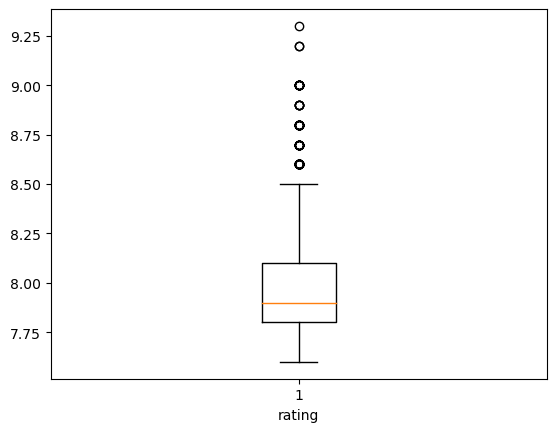

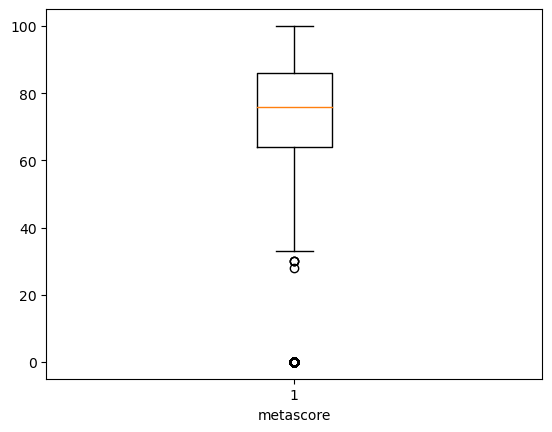

In [6]:
#finding outliers using box plot chart
for feature in numerical_vals:
    plt.boxplot(df[feature])
    plt.xlabel(feature)
    plt.show()

In [7]:
#now we start feature engineering
#first we transform the numerical vals
for feature in numerical_vals:
    length = len(df[feature])
    for i in range(length):
        if df[feature][i] == 0:
            pass
        else:
            df[feature][i] = np.log(df[feature][i])
            
            
for l in range(len(df['gross(M)'])):
    if df['gross(M)'][l] == 0:
        pass
    else:
        df['gross(M)'][l] = np.log(df['gross(M)'][l])
    
            

            

/tmp/ipykernel_21/204425457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature][i] = np.log(df[feature][i])
/tmp/ipykernel_21/204425457.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross(M)'][l] = np.log(df['gross(M)'][l])


In [8]:
#using min max scaler on dataset
features_to_scale=['runtime','rating','metascore','gross(M)']
others = [feature for feature in df.columns if feature not in features_to_scale]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[features_to_scale])
df[features_to_scale] = scaler.transform(df[features_to_scale])
print(df.columns)



Index(['Unnamed: 0', 'title', 'director', 'release_year', 'runtime', 'genre',
       'rating', 'metascore', 'gross(M)'],
      dtype='object')


In [9]:
#converting categorical values to numerical values

new_data = pd.get_dummies(df,columns=['director','genre'])
new_data = new_data.drop(['title','Unnamed: 0'],axis=1)


#for feature selection we will use random forest classifier and sklearns select from model
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

x_features = [feature for feature in new_data.columns if feature != 'gross(M)']
selector = SelectFromModel(estimator=LinearRegression().fit(new_data[x_features],new_data['gross(M)']))
selector.transform(new_data[x_features])
selected_feat = list(new_data[x_features].columns[(selector.get_support())])

n_data= new_data[selected_feat]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [10]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(n_data,new_data['gross(M)'],random_state=42)
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

#creating the model using

0.666366538287554


In [11]:
#evaluating model performance using cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, n_data, new_data['gross(M)'])
print(np.mean(scores))

    

0.2493129486825735
